In [1]:
import pandas as pd
from pathlib import Path
from star_finder import StarFinder
from star_matcher import StarMatcher
import matplotlib.pyplot as plt

In [2]:
root = Path(r"D:\Astro\20220804\M31")
file_list = (root / "light").glob("*.fit")
file_list = list(file_list)
print(f"Numer of images: {len(file_list)}")

Numer of images: 40


In [3]:
starfinder = StarFinder()
starmatcher = StarMatcher()
starData = starfinder.getStarData(file_list[0], topk=40)
star_img = starData["image"]
df_ref = starData["stars"]

Calculating FWHM: 100%|██████████| 163/163 [00:01<00:00, 154.69it/s]


In [4]:
df_ref

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y
0,317,1077.940063,2675.476341,9.000977,10.000977,10.371449,11.472159,"[1068, 2665, 1088, 2686]",693353,10954,11.651162,12.417073
1,313,3688.958466,2779.939297,10.000977,10.000977,11.460134,11.232829,"[3679, 2770, 3699, 2790]",720942,11425,10.934009,10.599431
2,294,2049.350340,1514.969388,10.999023,9.999023,10.504227,9.697573,"[2039, 1506, 2060, 1524]",393156,6174,9.291494,8.205804
3,262,2362.278626,1843.152672,8.999023,10.999023,8.978212,10.988777,"[2354, 1833, 2371, 1853]",478187,7614,5.239880,5.769113
4,259,3592.115830,1516.274131,12.999023,7.000977,12.155213,8.894250,"[3582, 1508, 3602, 1525]",393542,6222,7.735784,6.688691
5,228,693.548246,2783.640351,7.000977,11.999023,8.055004,11.167551,"[685, 2775, 702, 2792]",721229,11332,6.211357,8.031431
6,227,2602.185022,1891.414097,9.999023,9.000977,9.170785,10.046211,"[2594, 1883, 2611, 1900]",490679,7751,6.817242,6.720794
7,208,1162.899038,2596.009615,6.000977,9.000977,7.871802,10.231008,"[1155, 2588, 1171, 2604]",672655,10566,6.393237,7.977677
8,205,2200.868293,2272.156098,7.000977,8.000977,8.674451,9.950259,"[2193, 2264, 2209, 2280]",588998,9299,6.590522,6.930339
9,188,1162.356383,2521.345745,6.000977,10.999023,7.027798,10.547986,"[1155, 2513, 1170, 2529]",652971,10306,5.789778,6.783783


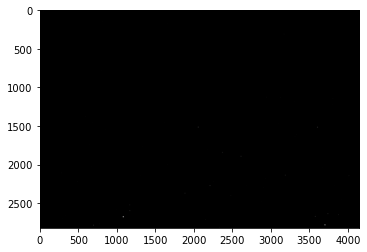

In [5]:
plt.imshow(star_img, cmap='gray')

In [6]:
df_fwhm = None

for i, tgt_file in enumerate(file_list):
    print(f"Processing {tgt_file}...")
    df_tgt = starfinder.getStarData(tgt_file, topk=10)['stars']

    df_matched = starmatcher.matchStars(df_ref, df_tgt)
     
    if df_fwhm is None:
        df_fwhm = df_matched[['index_ref', 'fwhm_x_ref', 'fwhm_y_ref', 'fwhm_x_tgt', 'fwhm_y_tgt']]
    else:
        df_fwhm = pd.merge(left=df_fwhm, right=df_matched[['index_ref', 'fwhm_x_tgt', 'fwhm_y_tgt']], how='left', on='index_ref', suffixes=('', f'_{i:05d}'))
    
    

df_fwhm.to_csv("fwhm.csv")

Processing D:\Astro\20220804\M31\light\L_M31_0121_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 275.43it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0122_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 503.76it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0123_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 103/103 [00:00<00:00, 519.59it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0124_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 510.59it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0125_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 92/92 [00:00<00:00, 466.89it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0126_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 79/79 [00:00<00:00, 523.25it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0127_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 79/79 [00:00<00:00, 521.62it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0128_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 94/94 [00:00<00:00, 531.81it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0129_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 81/81 [00:00<00:00, 518.28it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0130_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 100/100 [00:00<00:00, 543.45it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0131_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 517.75it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0132_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 529.01it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0133_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 532.45it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0134_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 101/101 [00:00<00:00, 422.62it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0135_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 91/91 [00:00<00:00, 466.66it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0136_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 521.05it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0137_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 94/94 [00:00<00:00, 520.54it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0138_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 519.53it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0139_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 81/81 [00:00<00:00, 530.09it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0140_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 526.48it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0141_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 507.21it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0142_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 92/92 [00:00<00:00, 506.24it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0143_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 542.76it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0144_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 520.13it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0145_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 503.41it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0146_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 66/66 [00:00<00:00, 539.70it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0147_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 102/102 [00:00<00:00, 609.16it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0148_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 542.50it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0149_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 92/92 [00:00<00:00, 562.84it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0150_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 95/95 [00:00<00:00, 543.83it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0151_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 102/102 [00:00<00:00, 540.76it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0152_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 80/80 [00:00<00:00, 551.73it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0153_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 518.19it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0154_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 78/78 [00:00<00:00, 514.07it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0155_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 90/90 [00:00<00:00, 563.62it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0156_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 80/80 [00:00<00:00, 567.17it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0157_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 67/67 [00:00<00:00, 540.60it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0158_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 103/103 [00:00<00:00, 555.57it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0159_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 92/92 [00:00<00:00, 537.92it/s]


Processing D:\Astro\20220804\M31\light\L_M31_0160_Bin1x1_300s__0C.fit...


Matching triangles: 100%|██████████| 94/94 [00:00<00:00, 515.75it/s]


In [7]:
df_fwhm.T.to_csv("fwhm_t.csv")